# 指数相关性

- 作者：DGC'Idea
- 版本：V0.1   
- 更新日期：2018年4月8日

----------

- 指数间及指数与大宗商品间相关性分析；
- 指数：沪深规模指数、行业指数、主题指数，恒生指数、恒生国企指数、标普500指数；
- 大宗商品：黄金、白银、原油。


In [1]:
import pandas as pd
import requests, json, os, re, time
import matplotlib.pyplot as plt
from datetime import timedelta,date,datetime

plt.rcParams['axes.unicode_minus']=False #用来正常显示负号  


#引入自定义库
import sys
sys.path.append('../PF')

from pf_idx import Index
index=Index('csv','../Data/')

from pf_cmm import Cmm
cmm=Cmm('csv','../Data/')

数据引擎：运行于研究
auth success 
指数框架：运行于研究
商品框架：运行于研究


## 1.数据准备

In [3]:
#大宗商品
commodity_list=cmm.pool.track

#A股指数
index_list=index.pool.watch.keys()
#index.pool.qsc.keys()[0:2]+index.pool.kj.keys()+index.pool.zj.keys()+index.pool.hk.keys()+['SPX','DJIA','NDAQ','GDAXI']


#获取指数价格
def get_index_price(years=10):
    df=pd.DataFrame()
    for code in index_list:
        name=index.pool.track[code]
        price_df=index.data.read(code,items=['close'],years=years)
        price_df=price_df.rename(columns={'close':name})
        df=pd.concat([df,price_df],axis=1)
    return df


#获取大宗商品价格
def get_commodity_price(years=10):
    df=pd.DataFrame()
    for code in commodity_list:
        name=cmm.pool.track[code]
        price_df=cmm.data.read(code,items=['close'],years=years)
        price_df=price_df.rename(columns={'close':name})
        df=pd.concat([df,price_df],axis=1)
    return df


#整理数据
def get_all_price(years=10):
    index_df=get_index_price(years=years)
    commodity_df=get_commodity_price(years=years)
    df=pd.concat([index_df,commodity_df],axis=1)
    print ('\r数据获取完成！',)
    return df.dropna()

price_df=get_all_price()
price_df

数据获取完成！


,全市场,深证综指,上证50,上证180,沪深300,中证500,中证1000,深证100,创业板指,中小板指,...,中证环保,中证传媒,全指证券,中证消费,恒生指数,恒生国企,标普500,伦敦金,伦敦银,布伦特原油
2015-05-19,6959.238,2567.287,3116.086,10413.33,4731.222,9124.833,11831.36,5206.813,3322.774,10196.282,...,2644.046,4066.14,1632.28,9249.363,27693.5391,14191.50,2127.8301,1207.76,17.100,64.45
2015-05-20,7056.229,2619.324,3122.850,10455.67,4754.919,9277.331,12132.37,5249.413,3406.284,10387.252,...,2691.386,4162.29,1604.66,9308.783,27585.0508,14235.90,2125.8501,1209.85,17.110,64.96
2015-05-21,7254.006,2713.419,3150.901,10584.95,4840.976,9619.223,12586.05,5417.788,3527.413,10856.310,...,2789.527,4244.17,1601.81,9652.979,27523.7207,14132.20,2130.8201,1206.18,17.150,66.48
2015-05-22,7387.118,2740.917,3248.855,10878.02,4951.335,9778.171,12687.29,5501.222,3516.627,10929.201,...,2833.397,4274.51,1653.20,9866.961,27992.8301,14433.40,2126.0601,1206.08,17.110,65.57
2015-05-26,7798.038,2884.661,3386.593,11389.01,5198.918,10373.580,13401.31,5777.556,3618.231,11564.428,...,2978.971,4425.58,1720.23,10414.140,28249.8594,14801.90,2104.2000,1187.26,16.740,63.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-14,4618.860,1660.330,3013.530,8716.05,3953.240,5131.130,5455.61,4323.670,1679.380,6192.940,...,1197.660,1269.83,737.65,15939.060,26521.8500,10507.85,2966.1500,1488.43,17.508,60.69
2019-10-15,4580.040,1641.950,3015.420,8689.29,3936.250,5061.000,5375.53,4290.310,1660.890,6084.340,...,1181.870,1249.16,728.24,16058.470,26503.9300,10500.17,2995.6800,1493.38,17.656,59.30
2019-10-16,4560.390,1635.650,3004.720,8651.91,3922.690,5038.360,5353.02,4282.680,1656.370,6082.180,...,1174.920,1248.31,725.01,15783.180,26664.2800,10532.17,2989.6900,1481.23,17.414,58.90
2019-10-17,4558.940,1635.920,3011.750,8659.38,3925.220,5029.850,5347.27,4284.840,1658.260,6117.310,...,1167.640,1256.26,721.35,15804.630,26848.4900,10588.17,2997.9500,1490.25,17.401,58.99


## 1.计算相关性

In [4]:
#设置pd显示小数点位
pd.set_option('precision',4)
pd.option_context('display.float_format', lambda x: '%.4f' % x)
#设置pd显示行列数目
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
#计算相关性
corr_df=price_df.corr()
#保存结果
index.data.save('idx_relevance',corr_df)
corr_df 

,全市场,深证综指,上证50,上证180,沪深300,中证500,中证1000,深证100,创业板指,中小板指,全指医药,全指金融,全指消费,全指信息,食品饮料,中证红利,中证养老,中证军工,中证环保,中证传媒,全指证券,中证消费,恒生指数,恒生国企,标普500,伦敦金,伦敦银,布伦特原油
全市场,1.0000,0.9776,0.3104,0.6355,0.6963,0.9830,0.9121,0.7959,0.8984,0.9582,0.8808,0.7013,0.0020,0.9551,-0.2669,0.6304,0.9589,0.8732,0.9636,0.8581,0.9295,-0.2053,-0.0672,0.3659,-0.4849,-0.3148,0.2174,-0.2616
深证综指,0.9776,1.0000,0.1317,0.4725,0.5488,0.9737,0.9649,0.6914,0.9261,0.9258,0.8375,0.5731,-0.1394,0.9658,-0.3991,0.4868,0.9354,0.8922,0.9765,0.8964,0.9164,-0.3465,-0.2213,0.1954,-0.6045,-0.3417,0.3029,-0.3926
上证50,0.3104,0.1317,1.0000,0.9227,0.8898,0.1815,-0.0973,0.7641,-0.0135,0.3322,0.4295,0.8503,0.8429,0.1205,0.7550,0.8854,0.2821,-0.0594,0.0828,-0.1264,0.1943,0.7965,0.8340,0.8865,0.6179,0.3442,-0.0911,0.6112
上证180,0.6355,0.4725,0.9227,1.0000,0.9907,0.5384,0.2729,0.9144,0.3533,0.6478,0.6969,0.9409,0.6694,0.4751,0.4919,0.9517,0.6120,0.3195,0.4438,0.2522,0.5263,0.5520,0.6412,0.8720,0.2987,0.1040,-0.0571,0.4065
沪深300,0.6963,0.5488,0.8898,0.9907,1.0000,0.6011,0.3457,0.9601,0.4149,0.7185,0.7584,0.9466,0.6285,0.5394,0.4435,0.9574,0.6810,0.3666,0.5154,0.3127,0.5615,0.5051,0.6121,0.8543,0.2334,0.0895,0.0022,0.3529
中证500,0.9830,0.9737,0.1815,0.5384,0.6011,1.0000,0.9462,0.7098,0.9396,0.9589,0.8589,0.5877,-0.1375,0.9721,-0.3981,0.5215,0.9653,0.9316,0.9869,0.9202,0.9292,-0.3371,-0.1773,0.2815,-0.5936,-0.4284,0.1679,-0.3297
中证1000,0.9121,0.9649,-0.0973,0.2729,0.3457,0.9462,1.0000,0.4975,0.9585,0.8516,0.7236,0.3837,-0.3530,0.9563,-0.6022,0.2688,0.8751,0.9461,0.9661,0.9624,0.9089,-0.5546,-0.4474,-0.0102,-0.7764,-0.4631,0.2617,-0.5454
深证100,0.7959,0.6914,0.7641,0.9144,0.9601,0.7098,0.4975,1.0000,0.5428,0.8302,0.8402,0.9135,0.5107,0.6633,0.3098,0.9045,0.7903,0.4676,0.6459,0.4422,0.6309,0.3721,0.4852,0.7432,0.0649,0.0566,0.1270,0.1921
创业板指,0.8984,0.9261,-0.0135,0.3533,0.4149,0.9396,0.9585,0.5428,1.0000,0.8782,0.7708,0.4293,-0.2691,0.9819,-0.5253,0.2866,0.9091,0.9655,0.9319,0.9838,0.9295,-0.4691,-0.3975,0.0606,-0.7249,-0.4741,0.1128,-0.4626
中小板指,0.9582,0.9258,0.3322,0.6478,0.7185,0.9589,0.8516,0.8302,0.8782,1.0000,0.9096,0.6684,-0.0127,0.9322,-0.2438,0.6214,0.9840,0.8289,0.9377,0.8374,0.8534,-0.1807,0.0129,0.4322,-0.4513,-0.3474,0.1355,-0.1851


## 1.相关性图

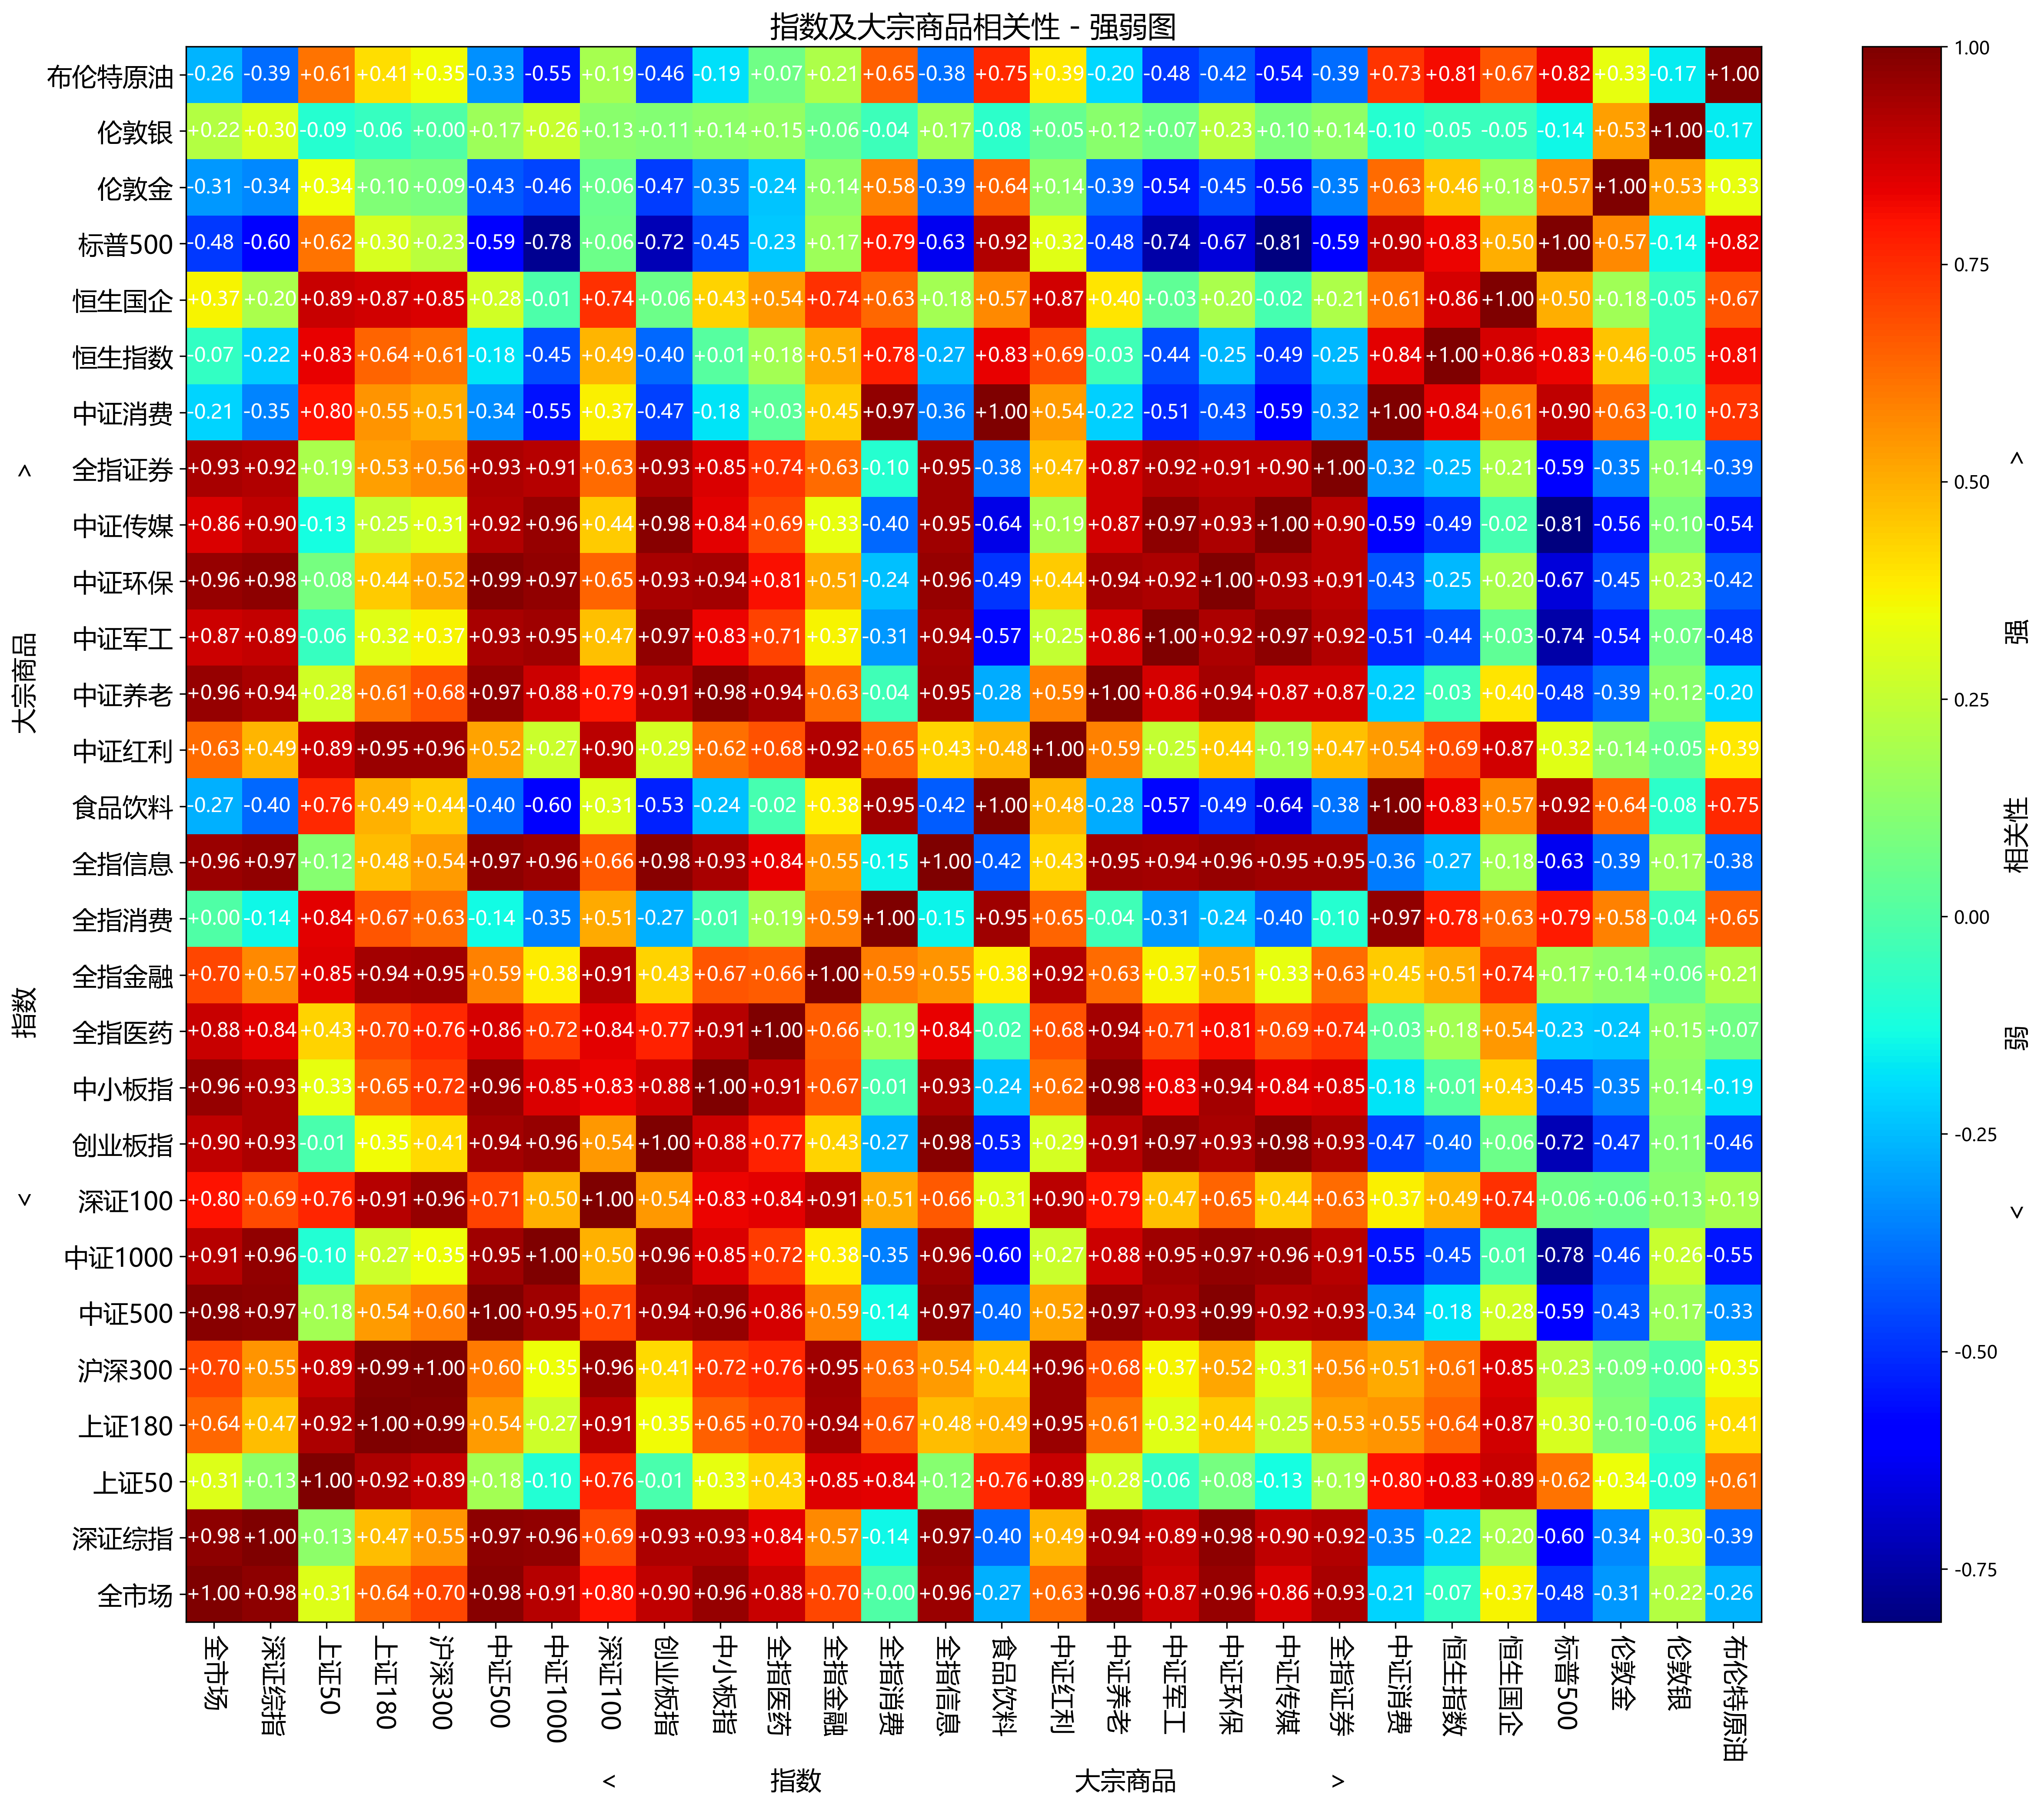

In [12]:
def heat(df):
    #相关性热力图
    #设置画板
    fig,ax=plt.subplots(figsize=(20,16),dpi=300) 
    #画图
    p=ax.imshow(df,cmap=plt.cm.jet,interpolation='none')
    #色板
    cbar=fig.colorbar(p,ax=ax)
    cbar.set_label('<　　　　　　弱　　　　　　相关性　　　　　　强　　　　　　>',fontsize=14)  
    #设置x轴刻度在上方
    # ax.xaxis.tick_top()
    #设置x轴刻度及文字
    ticks=range(len(df))
    labels=corr_df.columns  
    ax.invert_yaxis()
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels,fontsize=14,rotation=270)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels,fontsize=14)
    #标题
    ax.set_ylabel('<　　　　　　指数　　　　　　　　　　大宗商品　　　　　　>',fontsize=14)  
    ax.set_xlabel('<　　　　　　指数　　　　　　　　　　大宗商品　　　　　　>',fontsize=14) 
    plt.title('指数及大宗商品相关性 - 强弱图',fontsize=16)
    #强弱值
    for i in ticks:
        for j in ticks:
            ax.text(i-0.5,j-0.1,'%+.2f'%(df.iloc[i,j]),fontsize=11,color='white')
    return fig
    #保存图片
    fig.savefig('index_relevance.png',dpi=120,bbox_inches='tight')

    
fig=heat(corr_df)    
index.value.chart.to_image(fig,'idx_relevance')